# MOwNiT by Jakub Stępień

## Laboratorium 3

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [1]:
# using Pkg
# Pkg.add("Interpolations")

In [2]:
using Plots

In [3]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.4628324865808522
 0.43242018963228035
 0.9640189473215139
 0.7242931521112587
 0.17292009755646798
 0.08696131930474926
 0.1641688075517408
 0.5385334481144104
 0.35297754978811213
 0.7792488599498667

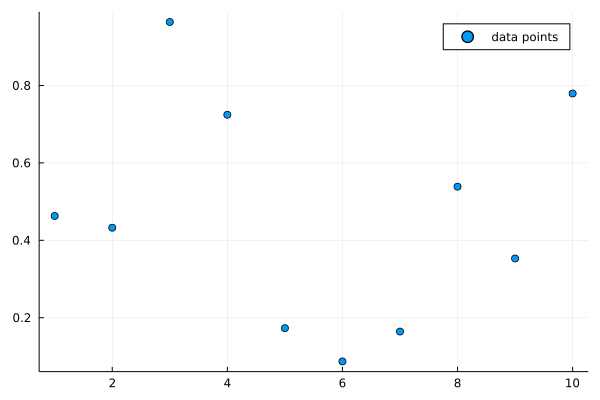

In [4]:
scatter(xs,ys, label="data points")

In [5]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
# import Pkg; Pkg.add("Polynomials")
# using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

LoadError: UndefVarError: fit not defined

In [6]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

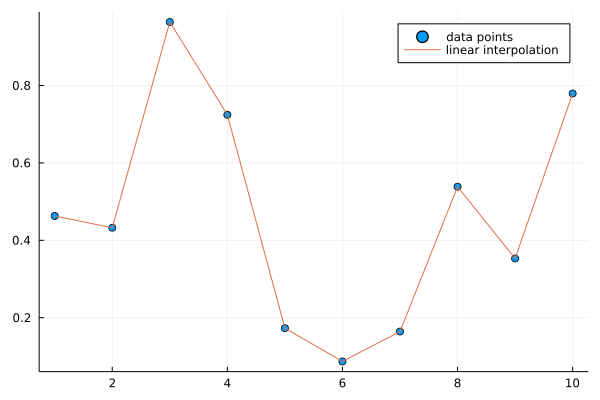

In [7]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

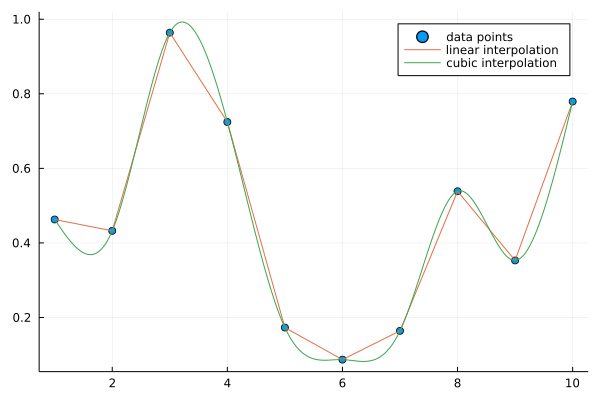

In [8]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [9]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.4628324865808522
 0.4324201896322803
 0.9640189473215138
 0.7242931521112587
 0.172920097556468
 0.08696131930474926
 0.1641688075517408
 0.5385334481144104
 0.35297754978811213
 0.7792488599498667

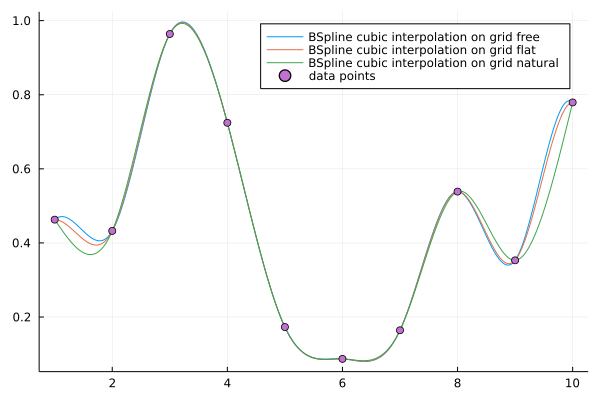

In [10]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. Jako narzędzie do analizy danych użyć Julia DataFrames <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

## Zadanie 1

**Wielomian interpolacyjny Lagrange'a**

In [11]:
using Plots
using Random

In [12]:
function L(x, k, xn)
    numerator = 1
    denominator = 1
    
    for i in 1:length(xn)
        if xn[k] != xn[i]    
            numerator *= (x - xn[i])
            denominator *= (xn[k] - xn[i])
        end
    end     
    
    return numerator/denominator
end

function lagrange_interpolate(x, xn, yn)
    result = 0
    
    for i in 1:length(xn)
        result += L(x,i,xn) * yn[i]
    end
    
    return result
end

lagrange_interpolate (generic function with 1 method)

In [13]:
xn =  1:1:10
yn = [rand() for x in xn]
xn_lagrange = 1:0.01:10
yn_lagrange = [lagrange_interpolate(x, xn, yn) for x in xn_lagrange]

901-element Vector{Float64}:
  0.08107928340922677
  0.0842996759210893
  0.08726529800288849
  0.08999140789681703
  0.0924927564358244
  0.09478359779941643
  0.09687770011779305
  0.09878835592569998
  0.10052839246741274
  0.10211018185421146
  0.10354565107574228
  0.1048462918666207
  0.10602317042963988
  ⋮
 -0.9111490599247087
 -0.8482298877159938
 -0.781315678014559
 -0.7102868681223082
 -0.6350215305832413
 -0.5553953400285507
 -0.47128153969023545
 -0.38255090758091737
 -0.28907172233768524
 -0.19070972872742867
 -0.08732810281166123
  0.021212583231707827

In [14]:
LagrangeInterpolation(x) = lagrange_interpolate(x, xn, yn);

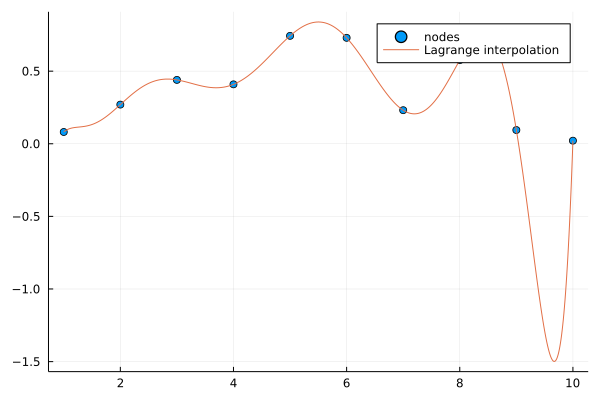

In [15]:
plot_1 = scatter(xn, yn, label="nodes")
plot_1 = plot!(xn_lagrange, yn_lagrange, label="Lagrange interpolation")

## Zadanie 2

**Metoda ilorazów różnicowych**

In [16]:
function NewtonInterpolation(x_values, y_values)
    n = size(x_values, 1)
    arr = Array{Float64}(undef, n, n)
    
    for i in 1:n
        arr[i, 1] = y_values[i]
    end
    
    for i in 1:n
        for j in 2:i
            arr[i, j] = (arr[i,j-1] - arr[i-1, j-1]) / (x_values[i] - x_values[i - j + 1])
        end
    end
    
    return [arr[i,i] for i in 1:n]
end;

In [17]:
newt = NewtonInterpolation(xn, yn)

10-element Vector{Float64}:
  0.08107928340922677
  0.18848831474843797
 -0.009172973682385843
 -0.03040096613518493
  0.031151625577034874
 -0.01687346483689046
  0.005384398165207307
 -0.0009600596580358565
  1.1136153438100614e-5
  5.4161949007527976e-5

In [49]:
function coefficients(x, x_values, n)
    arr = Array{Float64}(undef, n)
    arr[1] = x - x_values[1]
    
    for k in 2:n
        arr[k] = arr[k-1] * (x - x_values[k])
    end
    
    return arr
end;

function Newton_(x, x_values, y_values, div_diff_table)
    n = size(div_diff_table, 1) 
    coe(x) = coefficients(x, x_values, n)
    sum = 0
    
    for i in 2:n
        sum += div_diff_table[i] * coe(x)[i-1]
    end
    
    return y_values[1] + sum
end;

In [50]:
Horner(x) = Newton_(x, xn, yn, newt);

In [51]:
Horner(2)

0.26956759815766473

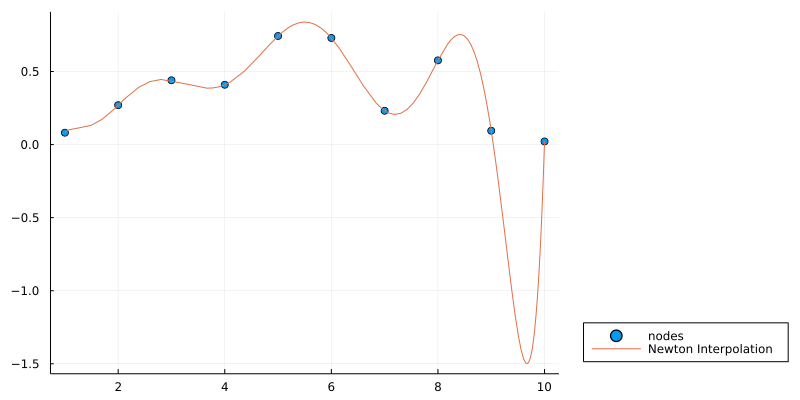

In [52]:
plot_2 = scatter(xn, yn, label="nodes")
plot_2 = plot!(Horner, label="Newton Interpolation", legend=:outerbottomright, size=(800,400))

## Zadanie 3

In [53]:
using Polynomials

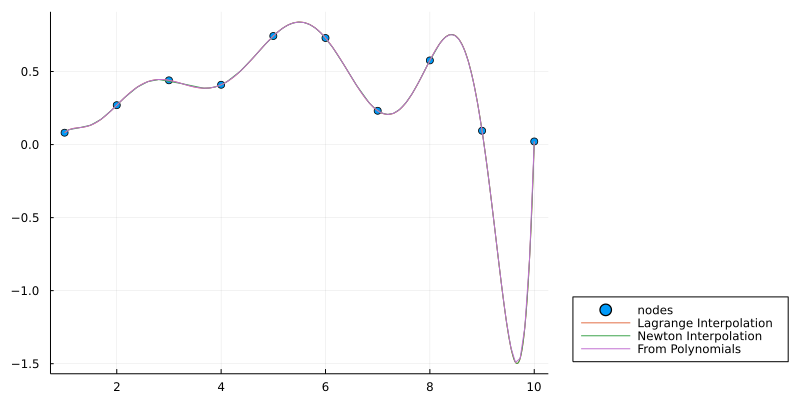

In [54]:
plot_3 = scatter(xn, yn, label="nodes", legend=:outerbottomright, size=(800,400))
plot_3 = plot!(xn_lagrange, yn_lagrange, label="Lagrange Interpolation")
plot_3 = plot!(Horner, label="Newton Interpolation")
plot_3 = plot!(fit(xn, yn), extrema(xn)..., label="From Polynomials")

Wszystkie otrzymane przez nas wykresy są identyczne. Oznacza to, że istnieje tylko jeden wielomian stopnia n-1 przechodzący przez n punktów.

## Zadanie 4

In [55]:
# using Pkg;
# Pkg.add("DataFrames")

In [56]:
using DataFrames
using Statistics

In [73]:
lagrange_arr = Array{Float64}(undef, 0)
newton_arr = Array{Float64}(undef, 0)
newton = Array{Float64}(undef, 0)
polynomials_arr = Array{Float64}(undef, 0)
polynomials = Array{Float64}(undef, 0)

Float64[]

In [76]:
for s in 1000:1000:10000
    X = 1:s
    Y = rand(s)
    for i in 1:10
        append!(newton_arr, @elapsed (Newton_arr = NewtonInterpolation(X, Y)))
        append!(newton, @elapsed Horner(1000)) # at point
        append!(lagrange_arr, @elapsed LagrangeInterpolation(1000))
        append!(polynomials_arr, @elapsed (f = fit(X, Y)))
        append!(polynomials, @elapsed f(1000)) # at point
    end
end

In [77]:
n = repeat(1000:1000:10000,10)
sort!(n)

100-element Vector{Int64}:
  1000
  1000
  1000
  1000
  1000
  1000
  1000
  1000
  1000
  1000
  2000
  2000
  2000
     ⋮
  9000
  9000
 10000
 10000
 10000
 10000
 10000
 10000
 10000
 10000
 10000
 10000

In [78]:
df1 = DataFrame(n = n, Newton = newton_arr, Lagrange = lagrange_arr, Polynomials = polynomials_arr);

In [79]:
aggregated1 = combine(
    groupby(df1, :n), 
    "Newton" => mean, 
    "Newton" => std,
    "Lagrange" => mean,
    "Lagrange" => std,
    "Polynomials" => mean,
    "Polynomials" => std
)

,n,Newton_mean,Newton_std,Lagrange_mean,Lagrange_std,Polynomials_mean
,Int64,Float64,Float64,Float64,Float64,Float64
1,1000,0.00789828,0.000142382,1.645e-6,5.50409e-7,0.00263325
2,2000,0.0291663,0.000121017,1.4545e-6,2.51489e-7,0.00883043
3,3000,0.0765423,0.0216431,1.6855e-6,6.44675e-8,0.0191292
4,4000,0.125102,0.010065,1.9549e-6,4.35138e-7,0.0340985
5,5000,0.192519,0.00265878,1.632e-6,5.87026e-8,0.0508344
6,6000,0.270298,0.00160324,1.6553e-6,8.13539e-8,0.0720232
7,7000,0.366093,0.00370142,1.7324e-6,1.41414e-7,0.0974844
8,8000,0.507244,0.0123581,1.8663e-6,3.5493e-7,0.127685
9,9000,0.682355,0.0308807,1.7501e-6,1.20833e-7,0.165826


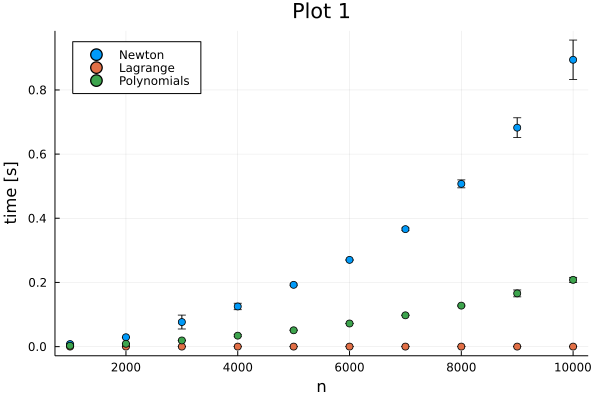

In [80]:
plot_4 = scatter(
    title = "Plot 1",
    ylabel = "time [s]",
    xlabel = "n",
    legend = :topleft
)

plot_4 = scatter!(
    label = "Newton",
    aggregated1.n,
    aggregated1.Newton_mean,
    yerr = aggregated1.Newton_std
)

plot_4 = scatter!(
    label = "Lagrange",
    aggregated1.n,
    aggregated1.Lagrange_mean,
    yerr = aggregated1.Lagrange_std
)

plot_4 = scatter!(
    label = "Polynomials",
    aggregated1.n,
    aggregated1.Polynomials_mean,
    yerr = aggregated1.Polynomials_std
)

In [81]:
df2 = DataFrame(n = n, Newton = newton, Polynomials = polynomials);
aggregated2 = combine(
    groupby(df2, :n), 
    "Newton" => mean, 
    "Newton" => std,
    "Polynomials" => mean,
    "Polynomials" => std
)

,n,Newton_mean,Newton_std,Polynomials_mean,Polynomials_std
,Int64,Float64,Float64,Float64,Float64
1,1000,3.1879e-6,8.1567e-7,1.192e-6,6.39745e-7
2,2000,2.8082e-6,4.01484e-7,9.241e-7,1.62375e-8
3,3000,2.8406e-6,2.35914e-7,1.0215e-6,1.66541e-7
4,4000,3.1689e-6,5.98471e-7,9.803e-7,1.04602e-7
5,5000,2.924e-6,2.85725e-7,1.0748e-6,1.73197e-7
6,6000,3.0228e-6,2.34296e-7,1.0311e-6,1.39677e-7
7,7000,2.9842e-6,3.35568e-7,1.0274e-6,1.5917e-7
8,8000,3.2106e-6,6.38888e-7,1.1523e-6,2.42391e-7
9,9000,3.3372e-6,4.56955e-7,1.1852e-6,2.27975e-7


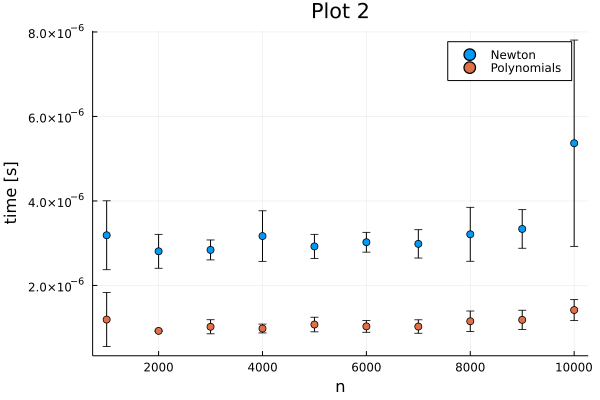

In [82]:
plot_4_1 = scatter(
    title = "Plot 2",
    ylabel = "time [s]",
    xlabel = "n"
)

plot_4_1 = scatter!(
    label = "Newton",
    aggregated2.n,
    aggregated2.Newton_mean,
    yerr = aggregated2.Newton_std
)

plot_4_1 = scatter!(
    label = "Polynomials",
    aggregated2.n,
    aggregated2.Polynomials_mean,
    yerr = aggregated2.Polynomials_std
)

## Zadanie 5

**Implementacja algorytmu Neville'a i przyrównanie wyników do wybranej interpolacji wielomianowej**

In [34]:
function neville_interpolate(xn, ys, x)
    
    # initialize matrix with zeros
    result = zeros(length(xn),length(xn))
    
    for i in 1:(length(ys))
        result[1, i] = ys[i]
    end
    d = length(xn) - 1
    for i in 2:length(xn)
        for j in 1:d
            result[i,j] =
            (
                ((xn[j] - x) * result[i - 1,j + 1] + (x - xn[j + i - 1]) * result[i - 1, j])
                / (xn[j] - xn[j + i - 1])
            )
        end
        d -= 1
    end
    return result[10,1]
end

neville_interpolate (generic function with 1 method)

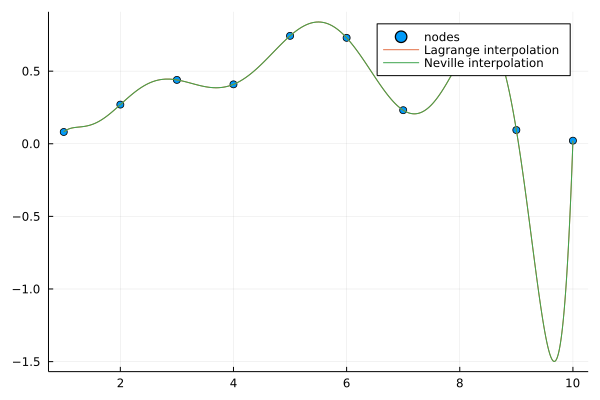

In [35]:
xn_neville = 1:0.001:10
yn_neville = [neville_interpolate(xn, yn, x) for x in xn_neville];

plot_5 = scatter(xn, yn, label="nodes")
plot_5 = plot!(xn_lagrange, yn_lagrange, label="Lagrange interpolation")
plot_5 = plot!(xn_neville, yn_neville, label="Neville interpolation")

## Zadanie 6

**Funkcje sklejane**

In [36]:
using Interpolations

In [37]:
x_values_6 = 1:10
y_values_6 = yn
# y_values_6 = [rand() for x in x_values_6];
x_values_interp = 1:0.001:10

lin_interpolation = LinearInterpolation(x_values_6, y_values_6)
quad_interpolation = interpolate(y_values_6, BSpline(Quadratic(Free(OnGrid()))))
cubic_interpolation = CubicSplineInterpolation(x_values_6, y_values_6)

results_lin = [lin_interpolation(x) for x in x_values_interp]
results_quad = [quad_interpolation(x) for x in x_values_interp]
results_cubic = [cubic_interpolation(x) for x in x_values_interp]

9001-element Vector{Float64}:
 0.08107928340922677
 0.08125054407107608
 0.08142180483629147
 0.08159306580823886
 0.08176432709028435
 0.08193558878579386
 0.08210685099813354
 0.08227811383066931
 0.08244937738676728
 0.08262064176979332
 0.08279190708311364
 0.08296317343009409
 0.08313444091410083
 ⋮
 0.019964500043970462
 0.020077922931223485
 0.02019135702439738
 0.020304801202900263
 0.020418254346139635
 0.02053171533352362
 0.020645183044460124
 0.02075865635835726
 0.02087213415462255
 0.020985615312664095
 0.02109909871189002
 0.021212583231707827

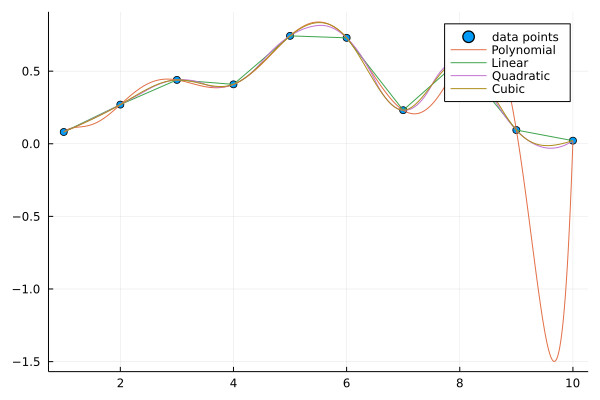

In [38]:
scatter(x_values_6, y_values_6, label="data points")
plot!(xn_neville, yn_neville, label="Polynomial")
plot!(x_values_interp, results_lin, label="Linear")
plot!(x_values_interp, results_quad, label="Quadratic")
plot!(x_values_interp, results_cubic, label="Cubic")

**Efekt Rungego**

In [39]:
using Plots
using Polynomials

In [40]:
fun(x) = 1 / (100x^2 + 0.1);

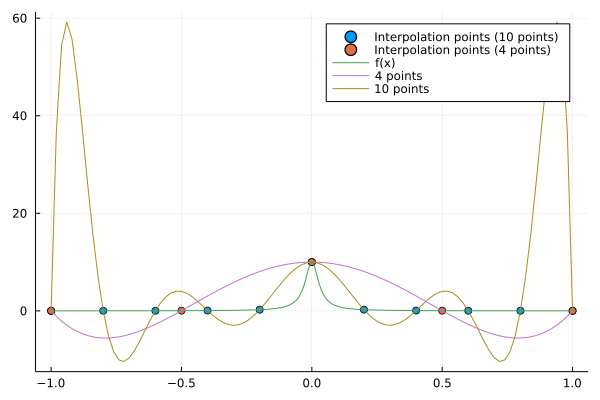

In [41]:
x_1 = -1:0.5:1
y_1 = [fun(x) for x in x_1]
x_2 = -1:0.2:1
y_2 = [fun(x) for x in x_2]

plot_r = scatter(x_2, y_2, label="Interpolation points (10 points)")
plot_r = scatter!(x_1, y_1, label="Interpolation points (4 points)")

plot_r = plot!(fun, label="f(x)")
plot_r = plot!(fit(x_1, y_1), extrema(x_1)..., label="4 points")
plot_r = plot!(fit(x_2, y_2), extrema(x_2)..., label="10 points")